# Homework 2
***
**Name**: Sahib Bajwa 
***

This assignment is due on Canvas by **9:30am on Thursday, September 17th 2020**. Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.

The rules to be followed for the assignment are:

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function or class API **do not** change it.
- Do not change the location of the data or data directory.  Use only relative paths to access the data. 

In [427]:
import pandas as pd
import numpy as np
import pickle
from pathlib import Path
import math

### [50 points] Problem 1
***

There are two functions that need to be completed:

#### normalization(fname, attr, normType)

- This function takes in the location of the data file, the attribute that has to be normalised (one of the values from 'open','high','low','close','volume') and the type of normalization to be performed('min_max' or 'z_score')

- Based on the normalisation type that is mentioned, you will have to apply the appropriate formula and return a dictionary where key = original value in the dataset, value = normalised value

#### correlation (fname1, attr1, fname2, attr2)

- This function takes in the location of the first data file, the attribute that has to be used in the first file, the location of the second data file and the attribute that has to be used in the second file.

- This function has to calculate the correlation coefficient between the two attributes mentioned in the two files.

Note:
- Download both the data files and store it in the location "data/dataset_1.csv" and "data/dataset_2.csv" . Please maintain this as it would be necessary while grading.
- Do not change the variable names of the returned values.
- If the test case fails, one way to debug is to see the output of the testing data and comparing it to your output.
- Initially the test case will be failed as there is no code in the below two functions.

In [428]:
def preprocess(fname):
    '''
    Input Parameters:
        fname: Name of the csv file containing historical quotes
    Output:
        A pandas dataframe with $ symbol removed from columns and converting columns to f
        A helper function provided to you to remove the $ symbols in the dataset. 
        Returns a pandas dataframe that you could use to answer further questions. 
    '''
    
    df = pd.read_csv(fname)
    df.columns = df.columns.str.replace(' ', '')
    
    columns = ["Close/Last", "Open", "High", "Low"]
    for column in columns:
        df[column] = df[column].str.replace('$', '')
        df[column] = df[column].astype(float)
    
    return df

In [429]:
def normalization (fname, attr, normType):
    #lecture 5
    #https://thispointer.com/pandas-dataframe-get-minimum-values-in-rows-or-columns-their-index-position/#:~:text=To%20find%20minimum%20value%20of%20every%20row%20in%20DataFrame%20just,with%20argument%20axis%3D1%20i.e.&text=It%20returned%20a%20series%20with%20row%20index%20label%20and%20minimum,while%20finding%20the%20min%20value.
    '''
    Input Parameters:
        fname: Name of the csv file contiaining historical quotes
        attr: The attribute to be normalized 
        normType: The type of normalization 
    Output:
        a dictionary where each key is the original column value and each value is the normalised column value. 
    '''
    # call the preprocess function to convert the data to float type and remove $ symbol in price
    df = preprocess(fname) 
    
    # type of normalization to be performed('min_max' or 'z_score')
    result = {}
    
    if normType == 'min_max':
        
        value = ((df[attr] - df[attr].min()) / (df[attr].max() - df[attr].min()))
#         * (df[attr].max() - df[attr].min()))
#         + df[attr].min()
        
        i = 0
        for x in df[attr]:
            result[x] = value[i]
            i = i + 1
            
    elif normType == 'z_score' :
        
        value = ((df[attr] - df[attr].mean()) / (df[attr].std()))
        
        i = 0
        for x in df[attr]:
            result[x] = value[i]
            i = i + 1

    return result

In [430]:
def correlation (fname1, attr1, fname2, attr2):
    '''
    Input Parameters:
        fname1: name of the first csv file containing historical quotes
        attr1: The attribute to consider in the first csv file (fname1)
        fname2: name of the second csv file containing historical quotes
        attr2: The attribute to consider in the second csv file (fname2)
        
    Output:
        correlation coefficient between attr1 in fname1 and attr2 in fname2
    '''
    
    correlation_coefficient = 0.0
    df1 = preprocess(fname1)
    df2 = preprocess(fname2)
        
    
    #TODO: Write code given the Input / Output Paramters.
#   https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corrwith.html
    
    correlation_coefficient = df1.corrwith(df2[attr2], axis = 0, drop = False, method = 'pearson')[attr1]
    
    return correlation_coefficient


In [431]:
import unittest

class TestKnn(unittest.TestCase):
    def setUp(self):
        self.loc1 = "data/test1.csv"
        self.loc2 = "data/test2.csv"
        file = open('data/testing_normalization', 'rb')
        self.data_normalization = pickle.load(file)
        file.close()
        file = open('data/testing_correlation', 'rb')
        self.data_correlation = pickle.load(file)
        file.close()
        file = open('data/testing_zscore', 'rb')
        self.zscore = pickle.load(file)
        
    def test0(self):
        """
        Test the label counter 
        """
        result = normalization(self.loc2,"Open","min_max")
        for key,value in self.data_normalization.items():
            self.assertAlmostEqual(result[key],value, places = 1)
            
    
    def test1(self):
        """
           Test zcore normalization
        """
        result = normalization(self.loc2, "Open", "z_score")
        for key, value in self.zscore.items():
            self.assertAlmostEqual(result[key], value, places = 1)
    
    def test2(self):
        """
        Test the label counter 
        """
        result = correlation(self.loc1,"Open",self.loc2,"Open")
        self.assertAlmostEqual(result,self.data_correlation, places = 1)
       
   
tests = TestKnn()
tests_to_run = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(tests_to_run)

...
----------------------------------------------------------------------
Ran 3 tests in 0.038s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

### [50 points] Problem 2
***

There are 4 functions that need to be completed:

1. For each of the graphs, the input function parameters and the expected output has been mentioned below.

Note:
- Make sure the dataset you are using is the one mentioned in the problem statement in canvas. The link has been provided.
- After defining your functions. Create another block to call these functions by passing the attributes mentioned in canvas.

In [432]:
import matplotlib
# Plot size to 14" x 7"
matplotlib.rc('figure', figsize = (14, 7))
# Font size to 14
matplotlib.rc('font', size = 14)
# Do not display top and right frame lines
matplotlib.rc('axes.spines', top = False, right = False)
# Remove grid lines
matplotlib.rc('axes', grid = False)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')

In [433]:
from matplotlib import pyplot as plt

def temporal_graph(x_data,y_data,xlabel,ylabel,title):
    '''Input : x_data and y_data are the lists containing the data points for x and y axis
    xlabel and ylabel are the labels that should be given to the corresponding axes
    title contains the title of the graph
    
    Output : A temporal graph displayed'''

# https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.subplots.html
# https://www.w3resource.com/graphics/matplotlib/basic/matplotlib-basic-exercise-5.php
# https://stackoverflow.com/questions/12608788/changing-the-tick-frequency-on-x-or-y-axis-in-matplotlib
# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib

# A single plot showing the temporal change of the “High” and “Low” attributes

    fig, ax = plt.subplots(figsize = (20, 10))
    plt.plot(x_data, y_data[0], label = "Low")
    plt.plot(x_data, y_data[1], label = "High")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(np.arange(0, len(x_data), 200))
    ax.legend()
    plt.show()

In [434]:
def boxplot(x_data,y_data, base_color, median_color, x_label, y_label, title):
    '''Input : x_data and y_data are the lists containing the data points for x and y axis
    base_color and median_color can be used to set colors in the graph.
    xlabel and ylabel are the labels that should be given to the corresponding axes
    title contains the title of the graph.
    
    Output : A boxplot displayed'''
    
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
# https://stackoverflow.com/questions/41997493/python-matplotlib-boxplot-color
# https://stats.stackexchange.com/questions/3476/how-to-name-the-ticks-in-a-python-matplotlib-boxplot
    
# A boxplot for the “Open” and “Close/Last” attributes.


    fig, ax = plt.subplots(figsize = (20, 10))
    boxplot1 = ax.boxplot(x_data, y_data, patch_artist=True)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(boxplot1[element], color = median_color)
        
    for patch in boxplot1['boxes']:
        patch.set(facecolor = base_color)

    ax.set(xlabel = x_label, ylabel = y_label, title = title)
    plt.xticks([1, 2], [y_data[0], y_data[1]])
    plt.show()

In [435]:
def histogram(data, x_label, y_label, title):
    '''Input : data is the list containing the data points for histogram buckets
    xlabel and ylabel are the labels that should be given to the corresponding axes
    title contains the title of the graph
    
    Output : A histogram displayed'''
    
# https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
    
#The 10-bin equal-width histogram for the “Volume” attribute.
    
    fig, ax = plt.subplots(figsize = (20, 10))
    plt.hist(data, bins = 10)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [436]:
def new_plot(x_data, y_data, xlabel, ylabel, title):
    '''Define this function as you would seem fit to display the plot that interests you using
    the same dataset. Define your function parameters and display the resulting plots'''
    
    fig, ax = plt.subplots(figsize = (20, 10))
    plt.plot(x_data, y_data[0], label = "Open")
    plt.plot(x_data, y_data[1], label = "Close")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(np.arange(0, len(x_data), 200))
    ax.legend()
    plt.show()

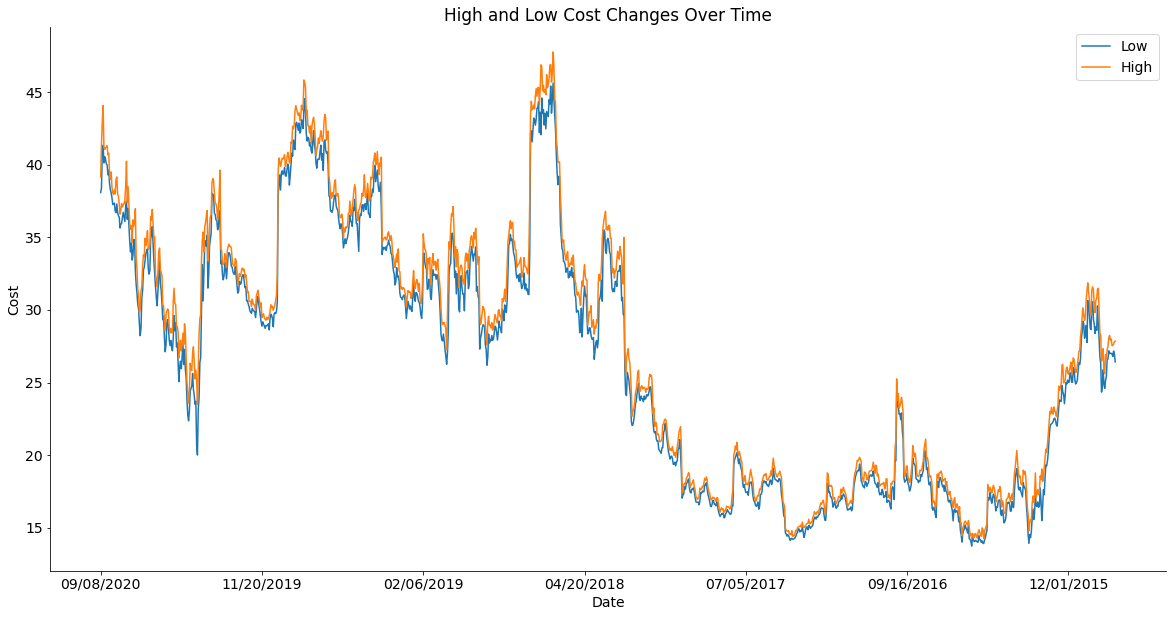

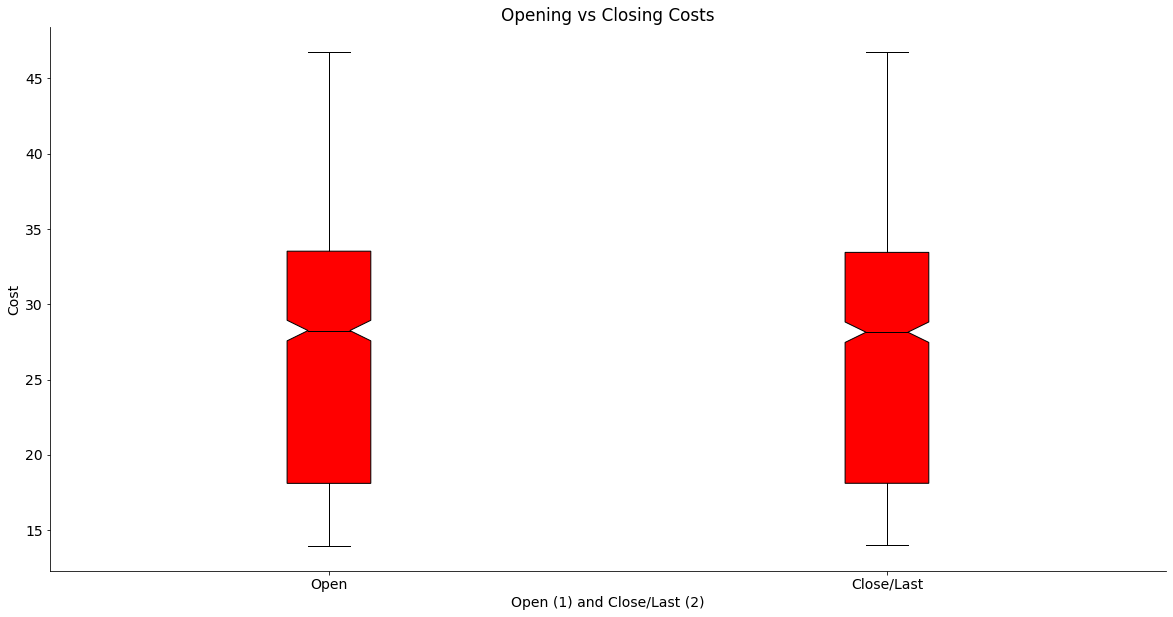

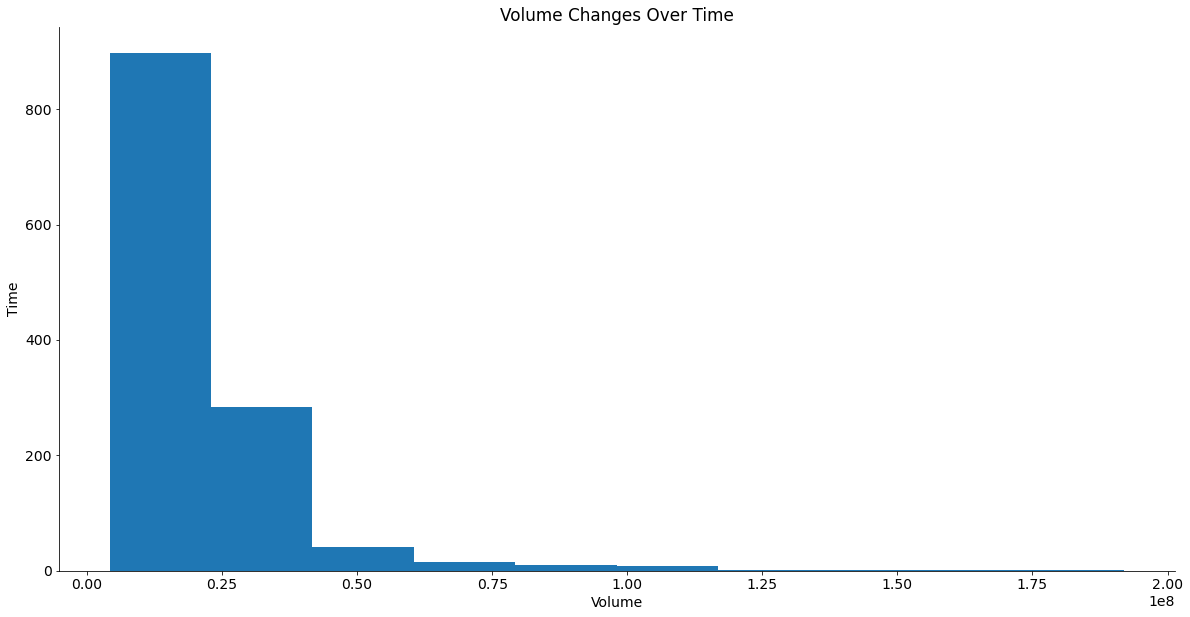

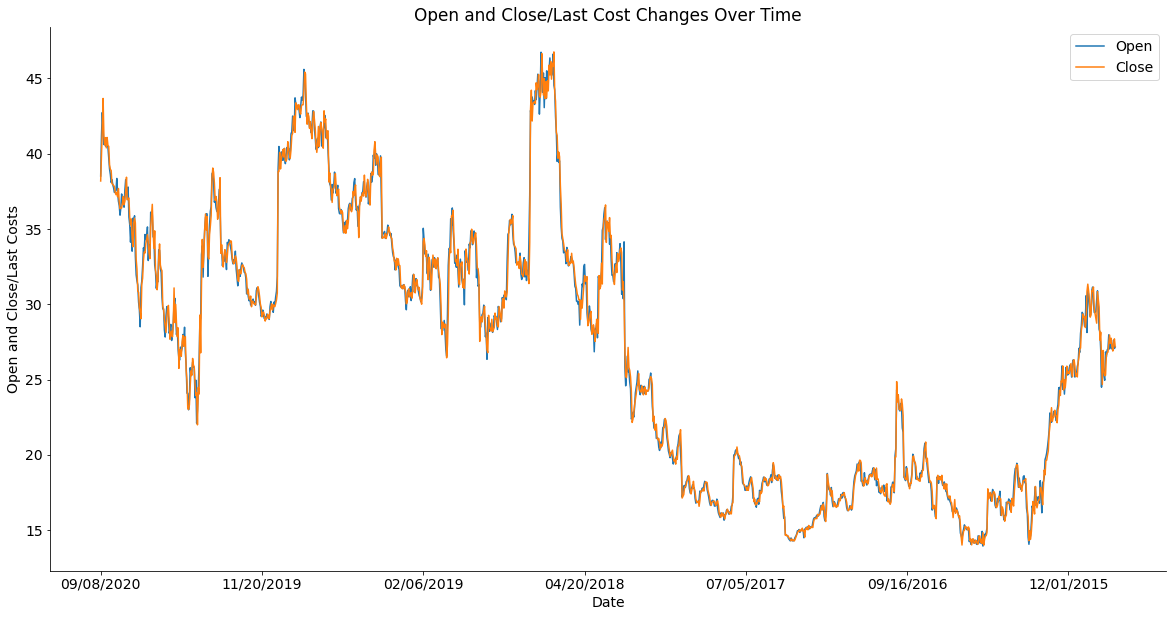

In [437]:
df = pd.read_csv('data/TWTR-5year.csv')

temporal_graph(df['Date'], [df['Low'], df['High']], 'Date', 'Cost', 'High and Low Cost Changes Over Time')

boxplot([df['Open'], df['Close/Last']], ['Open', 'Close/Last'], 'red', 'black', 'Open (1) and Close/Last (2)', 'Cost', 'Opening vs Closing Costs')

histogram(df['Volume'], 'Volume', 'Time', 'Volume Changes Over Time')

new_plot(df['Date'], [df['Open'], df['Close/Last']], 'Date', 'Open and Close/Last Costs', 'Open and Close/Last Cost Changes Over Time')